In [1]:
import os
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

In [7]:
max_features = 10000
max_len = 500

In [3]:
imdb_dir = '/home/dave/Downloads/aclImdb'

In [4]:
def generate_data(folder_name):
    folder_dir = os.path.join(imdb_dir, folder_name)
    labels = []
    texts = []
    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(folder_dir, label_type)
        for fname in os.listdir(dir_name):
            if fname[-4:] == '.txt':
                f = open(os.path.join(dir_name, fname))
                texts.append(f.read())
                f.close()
                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    labels = np.asarray(labels)

    return sequences, labels

In [5]:
x_train, y_train = generate_data("train")
x_test, y_test = generate_data("test")

In [8]:
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [10]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
______________________________________________

In [12]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [13]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 82s 4ms/sample - loss: 0.7113 - acc: 0.6250 - val_loss: 1.0015 - val_acc: 0.0000e+00
Epoch 2/10
20000/20000 [==============================] - 83s 4ms/sample - loss: 0.6427 - acc: 0.6250 - val_loss: 0.9653 - val_acc: 0.0000e+00
Epoch 3/10
20000/20000 [==============================] - 81s 4ms/sample - loss: 0.6147 - acc: 0.6256 - val_loss: 0.9084 - val_acc: 0.0050
Epoch 4/10
20000/20000 [==============================] - 82s 4ms/sample - loss: 0.5652 - acc: 0.6647 - val_loss: 0.8317 - val_acc: 0.2450
Epoch 5/10
20000/20000 [==============================] - 82s 4ms/sample - loss: 0.4641 - acc: 0.7908 - val_loss: 0.5978 - val_acc: 0.7036
Epoch 6/10
20000/20000 [==============================] - 85s 4ms/sample - loss: 0.3635 - acc: 0.8659 - val_loss: 0.6145 - val_acc: 0.7352
Epoch 7/10
20000/20000 [==============================] - 82s 4ms/sample - loss: 0.3044 - acc: 0.8904 - val_l

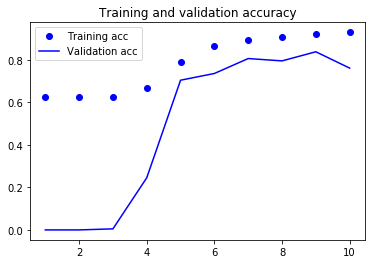

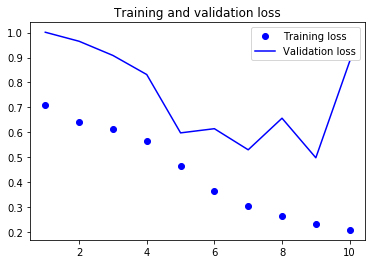

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()